# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

# 1) Is the distribution of body temperatures normal? 


### First let's visualize the distribution of attribute with a density plot.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import SVG, display
import math

C:\Users\karlk\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


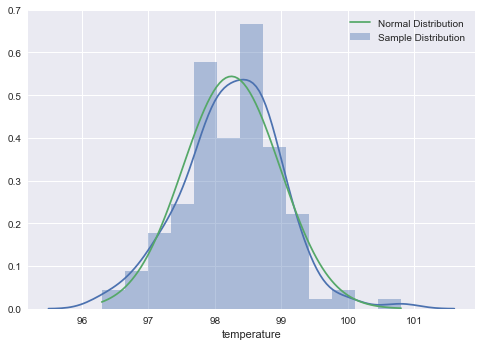

In [3]:
sns.distplot(df.temperature,label='Sample Distribution');
x=np.linspace(min(df.temperature),max(df.temperature),100)
pdf=stats.norm.pdf(x,loc=df.temperature.mean(),scale=df.temperature.std())
plt.plot(x,pdf,label='Normal Distribution')
plt.legend()
plt.show()

### One method we can use to test the normailty of our data is the sharpiro normality test. The null hypothesis of which is that there is a lack of statistical evidence of a difference in the distribution of the sample data and a normal distribution.
The Shapiro test can be conducted via scipy stats.sharpiro. Below is an svg of the shapiro test referenced from its wikipedia page. An svg is a quality graphic that scales to any browser zooming dimension.


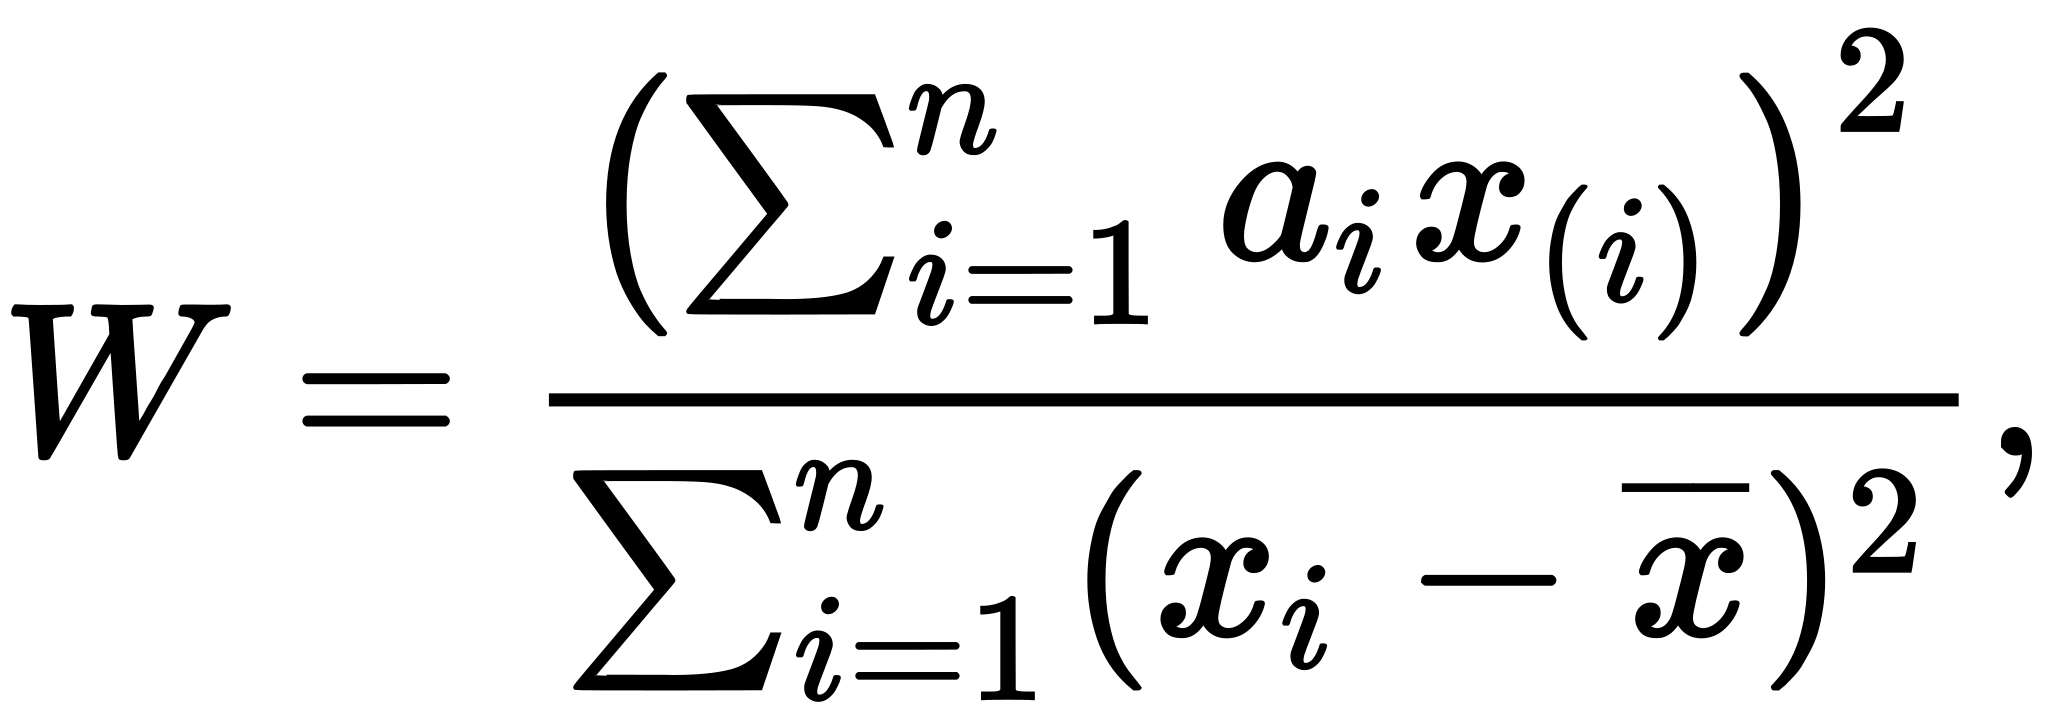

In [4]:
url = "https://wikimedia.org/api/rest_v1/media/math/render/svg/f34d67b2c658356c7deecdaaa42c67902e1669d1"
display(SVG(url=url))

where

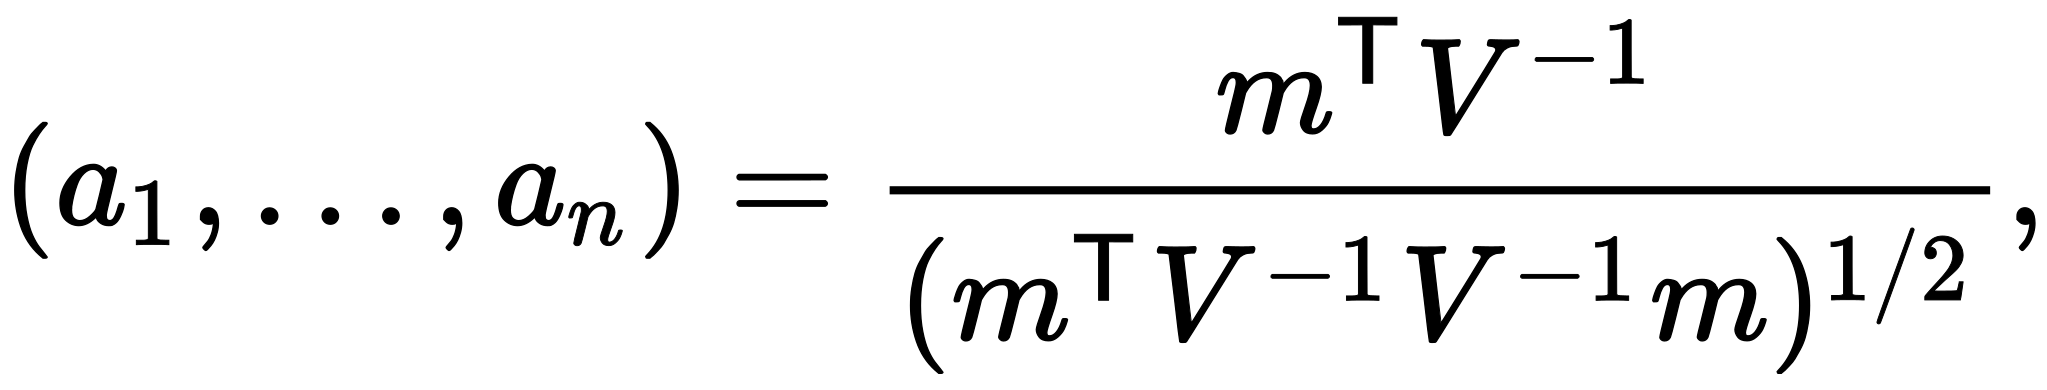

In [5]:
url = "https://wikimedia.org/api/rest_v1/media/math/render/svg/889a9a9103d34a3491a5996bb2732a76f3504836"
display(SVG(url=url))

$x_i$ is the /th order statistic, i.e. the /ith-smallest number in the sample.

$\overline{x}$ is the sample mean {$x_1$ ... $x_n$}
and {$m_1$ , … , $m_n$} are the expected values of the order statistics of independent and identically distributed random variables sampled from the standard normal distribution, and $V$ is the covariance matrix of those order statistics.

In [6]:
from scipy import stats   
stats.shapiro(df.temperature)

(0.9865769743919373, 0.2331680953502655)

From the results above we see that we fail to reject the null hypothesis in that there is a lack of statistically evidence of a difference between the distribution of our dataset and a normal distribution. This is based off of the p value being .23 (the test statistic = .99), had this value been .05 or less we would have evidence to reject the null. Thus the distribution of our data appears to be normal.

# 2) Is the sample size large? Are the observations independent? 


130 is larger than 30 so we can say this is sufficiently large. 

The second question is tricky without knowing the provenance of the data, but I will make the assumption that each individual is only measured once and is thus an independent observation. In addition to truely be independent, the individuals should probably included different ages, ethnic backgrounds, etc.. to be as diverse of sample individuals as possible.

# 3) Is the true population mean really 98.6 degrees F? 

It is highly unlikely that it is possible to obtain this data in a reliable way for the entire human population. To test this we will estimbate for the population based on our sample data. Thus since we do not know the population standard deviation we should use the T-statistic, we do know the supposed population mean but not the SD. As the sample size approaches the true population size the z and t statistics become more similar. A one sample t test would make sense since we have 1 sample.

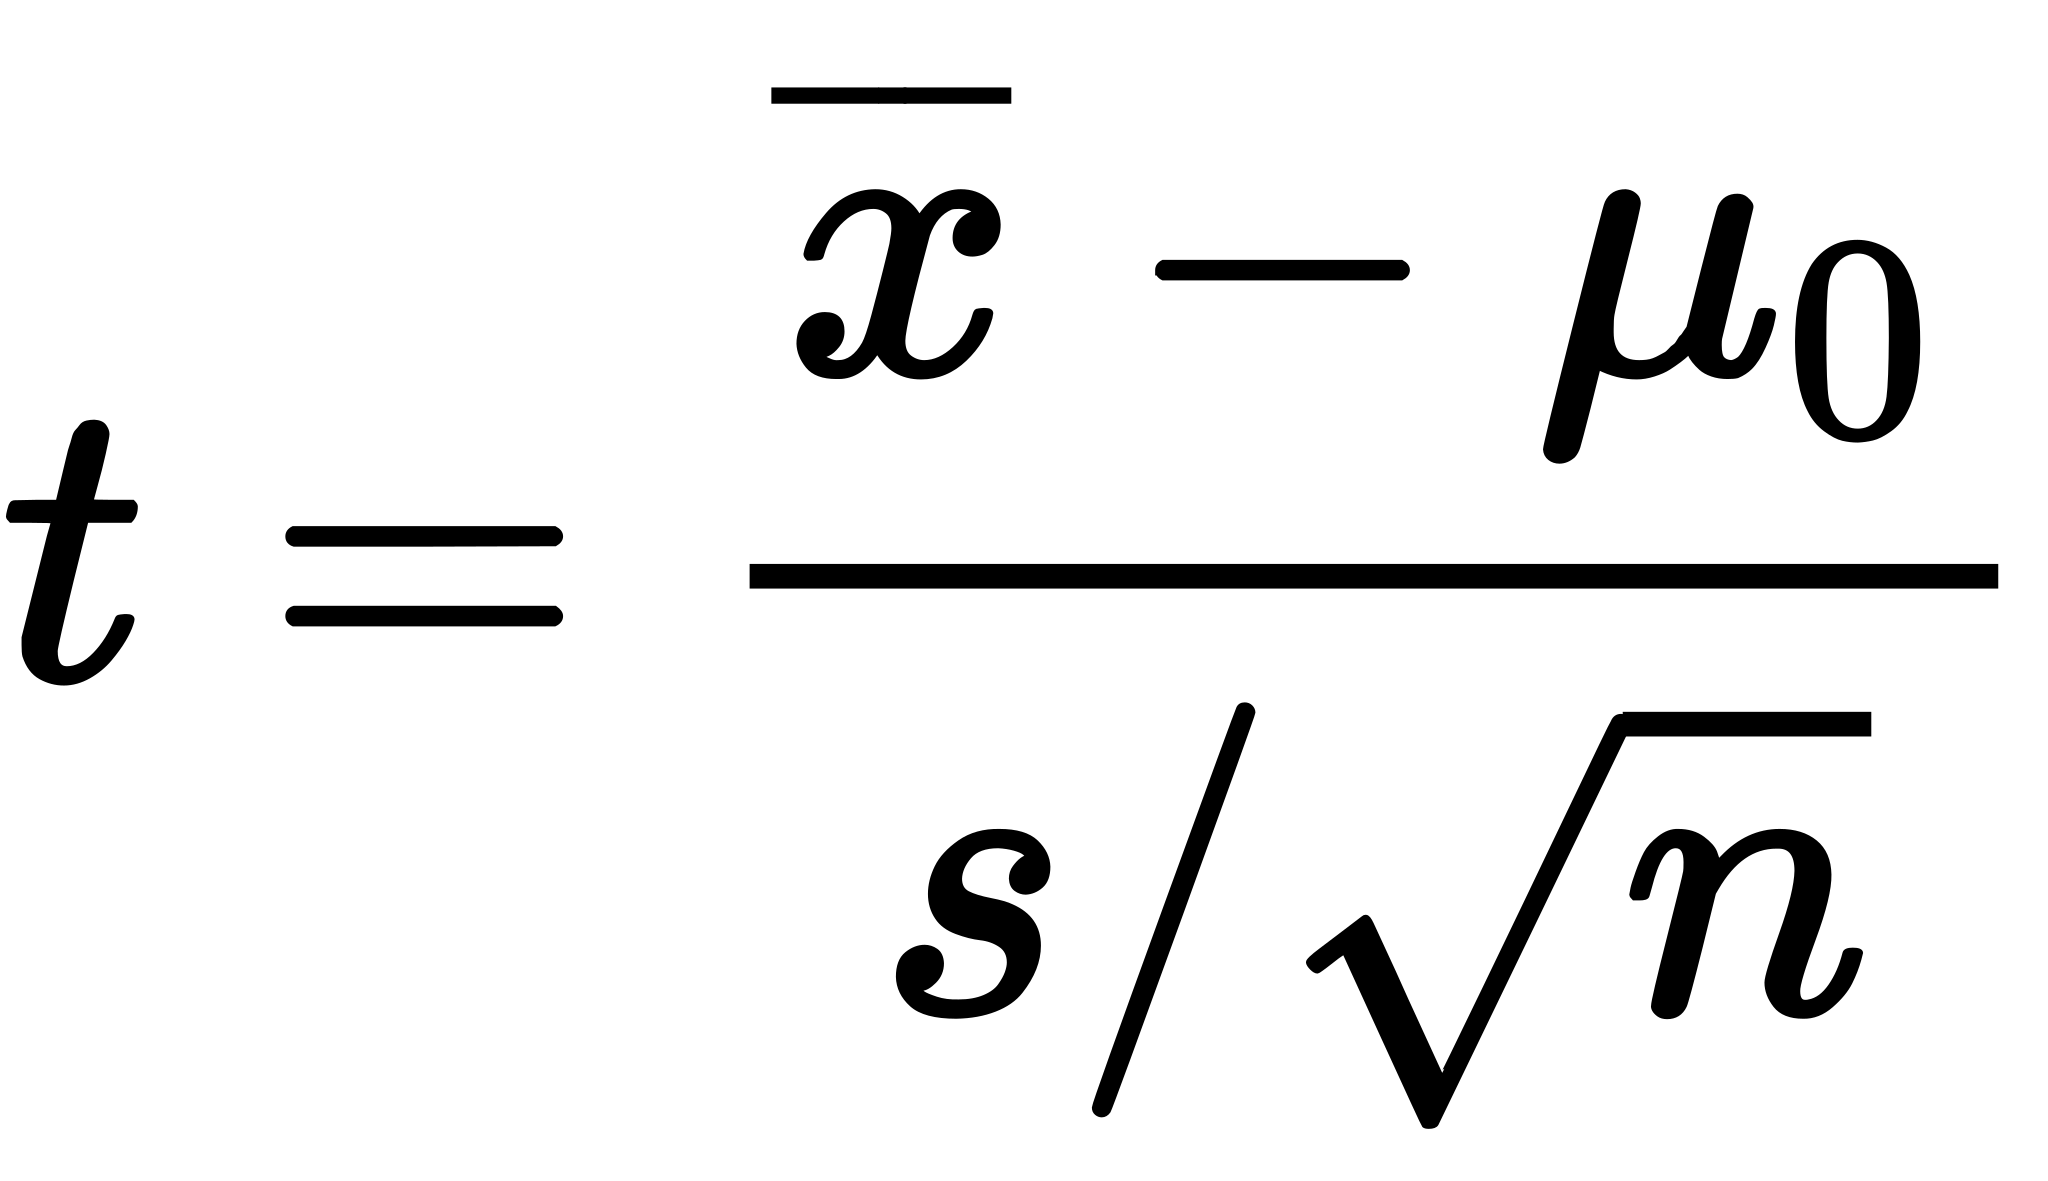

In [7]:
url = "https://wikimedia.org/api/rest_v1/media/math/render/svg/1063f91f450e9fd0094a38f1856eb11bd201d232"
display(SVG(url=url))

In [8]:
stats.ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

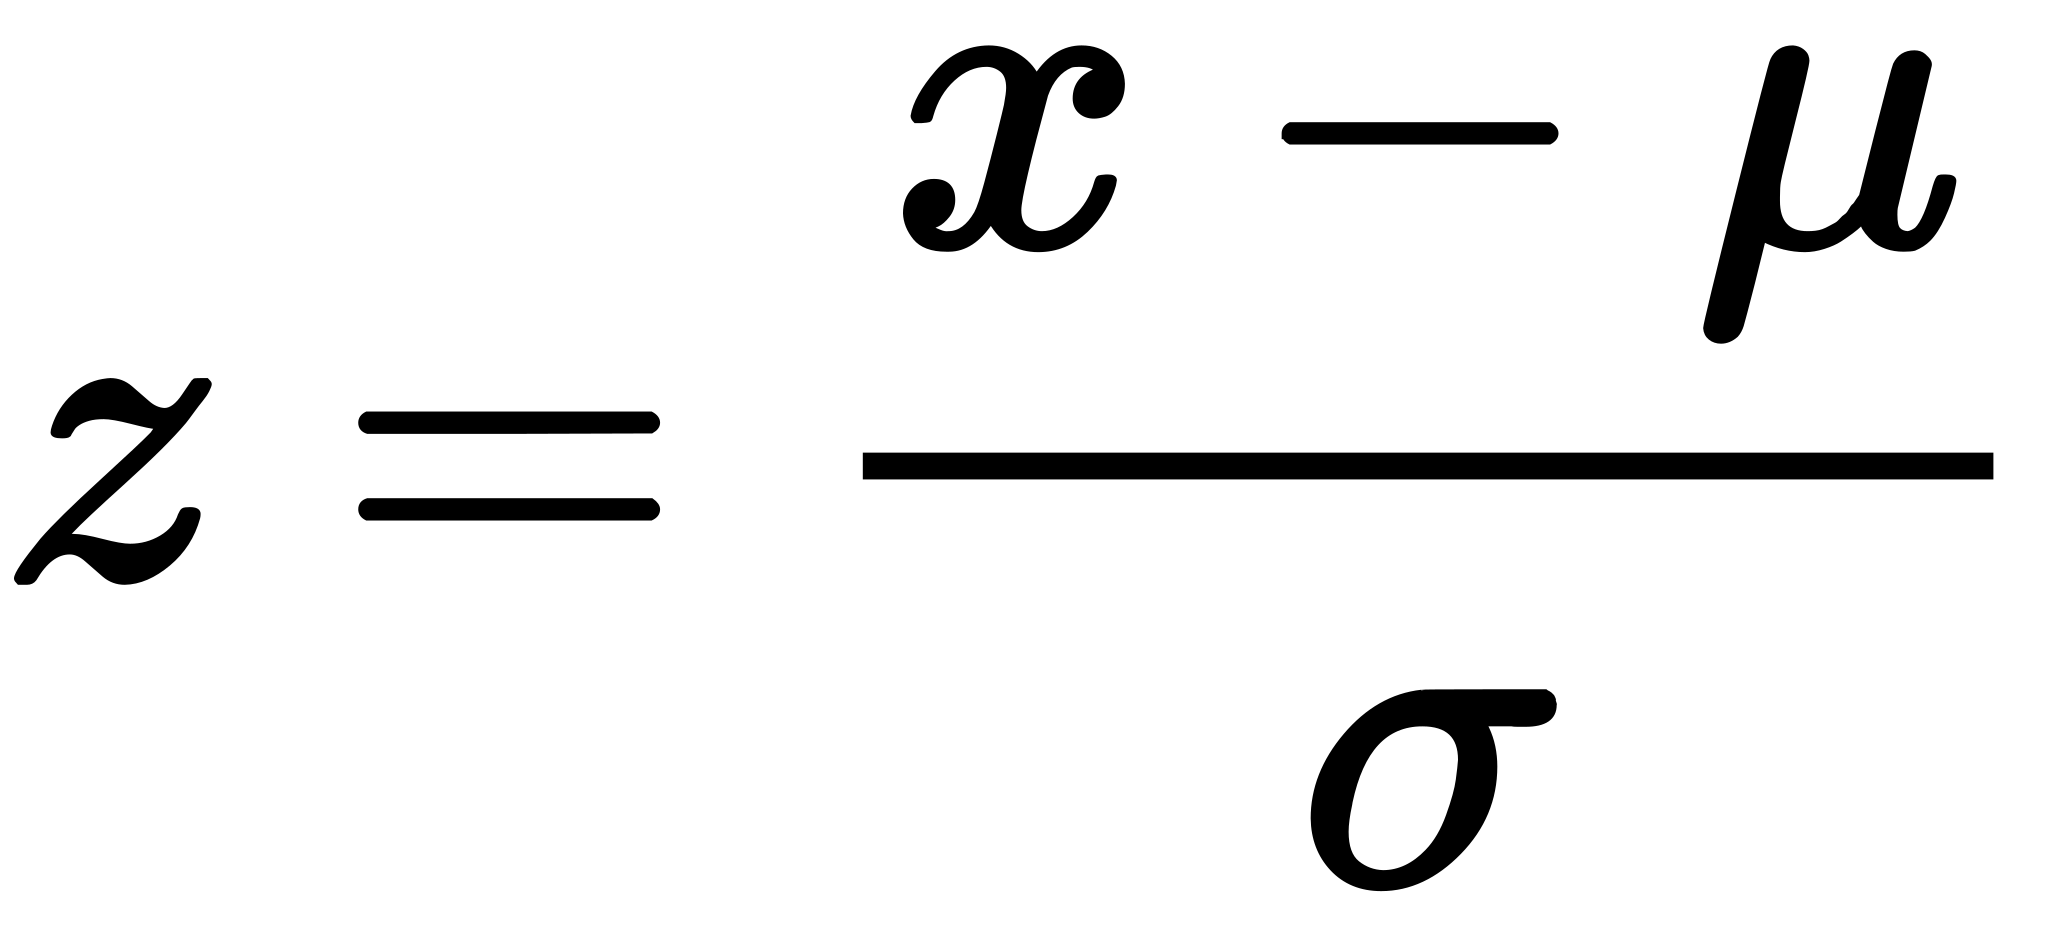

In [9]:
url = "https://wikimedia.org/api/rest_v1/media/math/render/svg/5ceed701c4042bb34618535c9a902ca1a937a351"
display(SVG(url=url))


In [10]:
sm.stats.ztest(df.temperature, value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

At smaller sample sizes the t statistic has wider tail than the z statistic so it makes sense that the p value would be larger than the z test p value. Both values are very close and we have evidence to reject the null hypothesis that there is not a statistically significant difference between the supposed true population mean and our sample mean.

# 4) At what temperature should we consider someone's temperature to be "abnormal"? 

To check this a confidence interval or margin of error should be calculated and then see if the 98.6 is within the confidence interval. The equation for the confidence interval is found below:

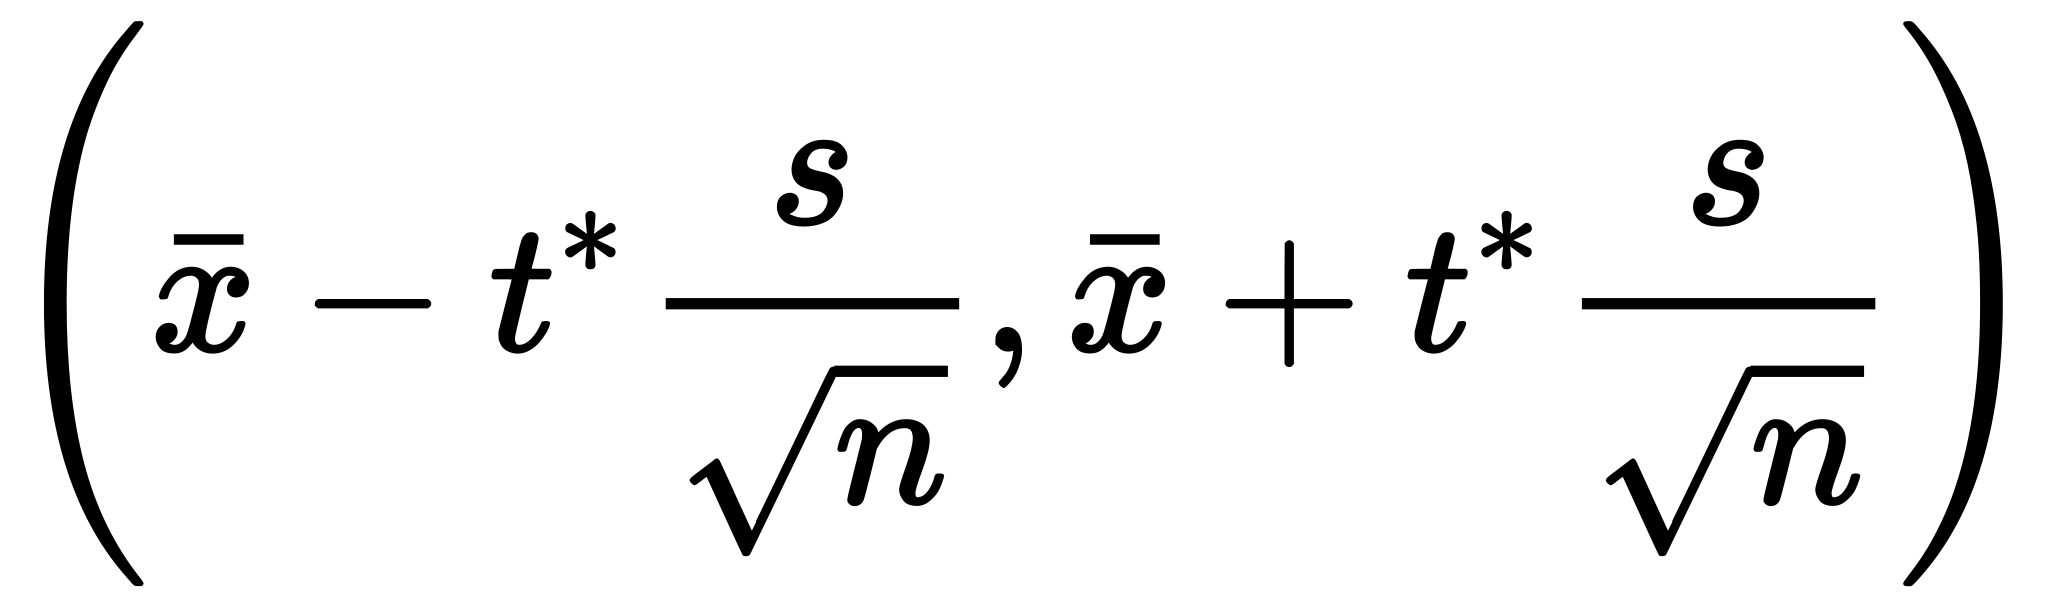

In [11]:
url = "https://wikimedia.org/api/rest_v1/media/math/render/svg/953450702f09946ea8f70bc38628be8e3a39f6ae"
display(SVG(url=url))

In [12]:
stats.t.interval(0.95, len(df.temperature)-1, 
                 loc=np.mean(df.temperature), 
                 scale=stats.sem(df.temperature))

(98.122002905608042, 98.376458632853513)

Above we can see that 98.6 does not fall within the confidence interval and can be considered abnormal.

# 5) Is there a significant difference between males and females in normal temperature? 

To test if there is a statistically significant difference in the means between men and women's temperature. This equation is found below:

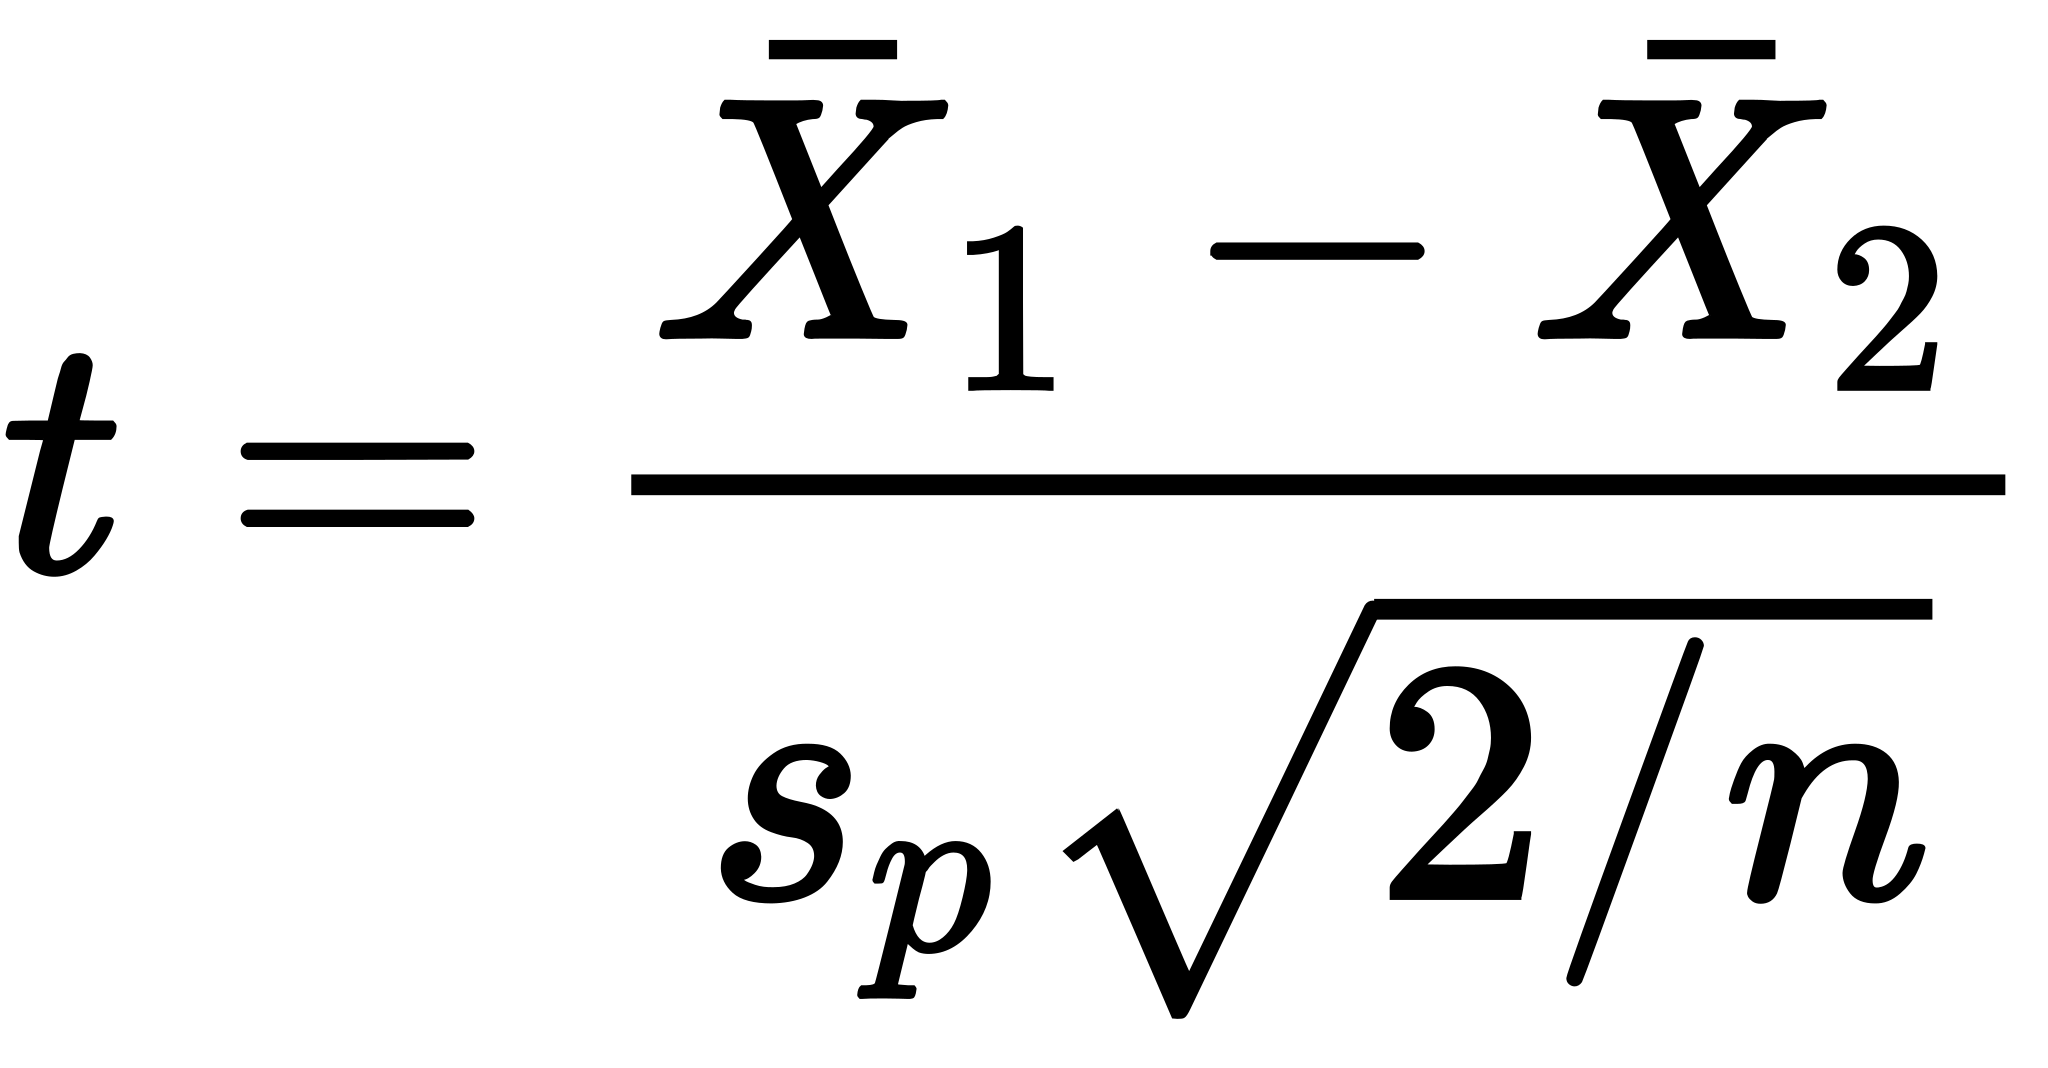

In [16]:
url = "https://wikimedia.org/api/rest_v1/media/math/render/svg/cad0574bf2031d40d0194bfbe427567367aab4a8"
display(SVG(url=url))

In [13]:
m = df.temperature.loc[df.gender=='M']
w = df.temperature.loc[df.gender=='F']

stats.ttest_ind(m, w, equal_var=False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

There is evidence of a statistically significant difference in mean temperature between men and women in this sample based on a non pooled ttest.